<a href="https://colab.research.google.com/github/MartinaWestrik/Life-Expectancy-World-Health-Organization/blob/main/Project_Classification_Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Načtení a příprava dat
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, roc_curve, auc, f1_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Načtení datasetu
data = pd.read_csv("waterQuality1.csv")

# Zobrazení základních informací o datech
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
# Čistění dat - odstranění chybných nebo neplatných hodnot
data['is_safe'] = pd.to_numeric(data['is_safe'], errors='coerce')
data = data.dropna(subset=['is_safe'])
data['is_safe'] = data['is_safe'].astype(int)
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')
data['ammonia'] = data['ammonia'].fillna(data['ammonia'].median())


In [ ]:
# Rozložení tříd
print("Původní rozložení tříd:")
print(data['is_safe'].value_counts())

Původní rozložení tříd:
is_safe
0    7084
1     912
Name: count, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [ ]:
# 2. Redukce a vyvážení dat pomocí SMOTE
# Redukce dat pro třídu is_safe == 0
class_0 = data[data['is_safe'] == 0].sample(2000, random_state=42)
class_1 = data[data['is_safe'] == 1]

In [ ]:
# Spojení obou tříd před SMOTE
combined_data = pd.concat([class_0, class_1])
X = combined_data.drop(columns=['is_safe'])
y = combined_data['is_safe']

In [ ]:
# Aplikace SMOTE pro vyvážení tříd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)





In [ ]:
y_train.value_counts()

,count
is_safe,
0,1600
1,1280


In [ ]:
smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Kontrola výsledného vyvážení tříd
print("Počet dat po aplikaci SMOTE:")
print(pd.Series(y_smote).value_counts())

Počet dat po aplikaci SMOTE:
is_safe
0    2000
1    2000
Name: count, dtype: int64


In [ ]:
# Vytvoření vyváženého datasetu
balanced_data = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.Series(y_smote, name='is_safe')], axis=1)

In [ ]:
# 3. Definice vybraných sloupců a rozdelení dat
X = balanced_data[["aluminium", "arsenic", "cadmium", "chloramine", "chromium", "silver"]]
y = balanced_data['is_safe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Kontrola rozložení tříd po rozdělení
print("Rozložení tříd v trénovací sadě:")
print(y_train.value_counts())
print("Rozložení tříd v testovací sadě:")
print(y_test.value_counts())

Rozložení tříd v trénovací sadě:
is_safe
1    1600
0    1600
Name: count, dtype: int64
Rozložení tříd v testovací sadě:
is_safe
1    400
0    400
Name: count, dtype: int64


In [ ]:
# 4. Normalizace/standardizace dat
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 5. Trénink modelu Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 6. Vyhodnocení modelu
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[343  57]
 [ 53 347]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       400
           1       0.86      0.87      0.86       400

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



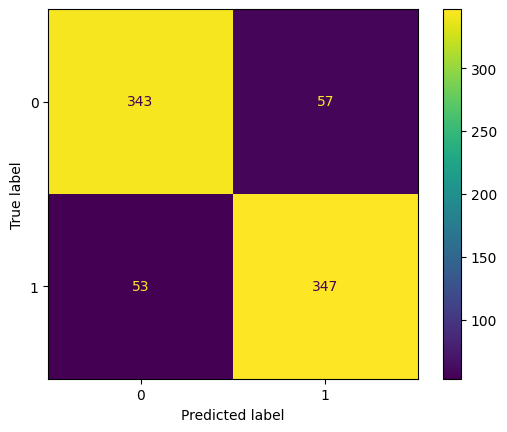

In [ ]:
# confusion matice
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
modely = {
    "knn": {"model": KNeighborsClassifier(), "parametry":{'n_neighbors':(3, 5, 7, 9), 'weights':["uniform", "distance"]}},
    "dt": {"model": DecisionTreeClassifier(), "parametry":{'splitter':("best", "random"), 'max_features':(None, "sqrt"), 'criterion':["gini", "entropy"]}},
    "lr": {"model": LogisticRegression(), "parametry":{'penalty':(None, "l1", "l2"), 'C':(0.1, 1, 10), 'solver':["liblinear", "lbfgs"]}},
    "rf": {"model": RandomForestClassifier(), "parametry":{'n_estimators':(50, 100, 200)}},
    "ab": {"model": AdaBoostClassifier(), "parametry":{'n_estimators':(50, 100, 200)}},
    "lsvm": {"model": LinearSVC(), "parametry":{'C':(0.1, 1, 10)}},
    "svm": {"model": SVC(), "parametry":{'C':(0.1, 1, 10), "kernel" : ("poly", "rbf"), "gamma": ("scale", "auto")}}
}

In [ ]:
results = []
nejlepsi_modely = {}
for model, nastaveni in modely.items():
  print(f"Zpracovávám {model} ...")
  gs = GridSearchCV(nastaveni["model"], nastaveni["parametry"], cv=2)
  gs.fit(X_train, y_train)
  best_model = gs.best_estimator_
  nejlepsi_modely[model] = best_model
  y_pred = best_model.predict(X_test)

  results.append({"metric": "f1", "model": model, "value": f1_score(y_test, y_pred)})
  results.append({"metric": "auc", "model": model, "value": roc_auc_score(y_test, y_pred)})
  results.append({"metric": "recall", "model": model, "value": recall_score(y_test, y_pred)})

Zpracovávám knn ...
Zpracovávám dt ...
Zpracovávám lr ...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='

Zpracovávám rf ...
Zpracovávám ab ...
Zpracovávám lsvm ...
Zpracovávám svm ...


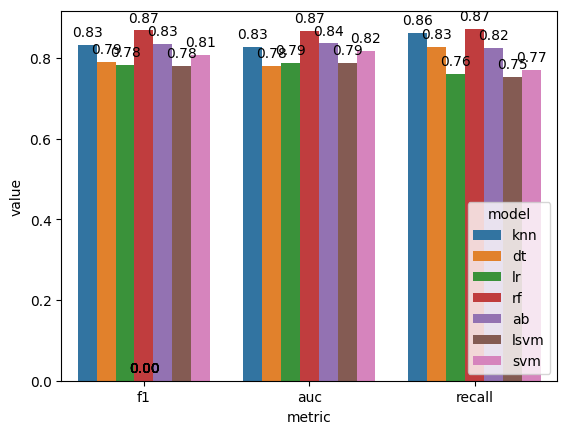

In [ ]:
# zpracování posbíraných výsledků list -> do pandas dataframu
results_df = pd.DataFrame.from_records(results)

# vykreslení výsledků jako bar chart pro různé metriky a modely
ax = sns.barplot(x='metric', y='value', hue='model', data=results_df)
# přidání hodnot nad sloupce
for p in ax.patches:
  ax.annotate(
      format(p.get_height(), '.2f'),
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha = 'center',
      va = 'center',
      xytext = (0, 9),
      textcoords = 'offset points')

plt.show()

In [ ]:
# 7. Závěrečná vizualizace a analýza
# ROC křivka - Random Forest
probs = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

AttributeError: 'str' object has no attribute 'predict_proba'